In [56]:
print("Hello new dataset!")

Hello new dataset!


# Разведочное исследование и поиск аномалий

Задача:
Повторить ключевые шаги разведочного анализа для нового датасета.
Описать ключевые выводы, к которым пришли.

Исходный csv-файл взят отсюда:

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset 

In [1]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [2]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [3]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [5]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


Мы проверили датасет на наличие пустых значений. 


In [7]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Давайте тут вспомним, что вообще такое коэффициент корреляции? От чего он зависит? О чем говорит? А о чем не говорит? В каких пределах измеряется? Какие значения КофКорр считаются значимыми? 

Проверим, сколько y нас уникальных значений в столбце Семейное положение

In [45]:
df_hr['MaritalStatus'].nunique()

3

Теперь посмотрим, что это за статусы семейного положения?

In [46]:
df_hr['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [ ]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

In [63]:
df_hr['GenderID'].count()

311

In [64]:
df_hr['GenderID'].sum()

135

In [ ]:
# Значит у нас есть 135 объектов со значением GenderID "1" и 311-135 объектов с GenderID знеачением "0"

In [70]:
df_hr['MarriedID'].sum()

124

In [27]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6


##  Сейчас будет чуть сложнее

In [23]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [30]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [37]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr['Age'])

In [ ]:
# Видим, что распределение явно смещенное, все выбросы справа
# Что это за распределение? 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей

In [38]:
# matplotlib histogram
plt.hist(df_hr['Age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

Text(61.25, 0.5, 'Amount of employees')

In [ ]:
# Видим, что распределение похоже на Лог-нормальное, 
# но мы его еще не проходили, поэтому ничего по нему проверить не можем, 
# а просто степенно ждем пары по статистике. 

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [39]:
import numpy as np

In [40]:
# Среднее значение по зарплате
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [41]:
# А медиана? 
np.median(df_hr.MonthlyIncome)

4919.0

In [ ]:
# Обращает внимание что медиана ниже среднего значения где-то на 7000. 
# О чем это говорит? 

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [42]:
# Variance (дисперсия) зарплат
np.var(df_hr.MonthlyIncome)

22149778.937456153

In [43]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823003

In [44]:
3*np.std(df_hr.MonthlyIncome)

14119.06549446901

In [76]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?

# Сделаем подвыборку из выборки

In [55]:
# Выделим в отдельные массивы сотрудников с разными MaritalStatus
df_hr_g1 = df_hr[df_hr['MaritalStatus'] == 'Single']
df_hr_g0 = df_hr[df_hr['MaritalStatus'] == 'Divorced']
df_hr_g2 = df_hr[df_hr['MaritalStatus'] == 'Married']

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8


In [48]:
df_hr_g0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,Y,No,17,3,4,80,1,5,1,2,5,2,4,3
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,2,Male,93,3,1,Laboratory Technician,4,Divorced,2661,8758,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8
16,32,No,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,21,1,Male,80,4,1,Research Scientist,2,Divorced,3298,15053,0,Y,Yes,12,3,4,80,2,7,5,2,6,2,0,5


In [54]:
print("Count of 'Single' is {}, for 'Married' is {} and for 'Divorced' is {} ".format(len(df_hr_g1),
                                                                                      len(df_hr_g2),
                                                                                      len(df_hr_g0)))

Count of 'Single' is 470, for 'Married' is 673 and for 'Divorced' is 327 


In [41]:
print("Median of salary for Gender_ID = 1 \
is {} and for Gender_ID = 0 is {}".format(np.median(df_hr_g1.Salary),
                                           np.median(df_hr_g0.Salary)))

Median of salary for Gender_ID = 1 is 63353.0 and for Gender_ID = 0 is 62066.5


<AxesSubplot:xlabel='Salary'>

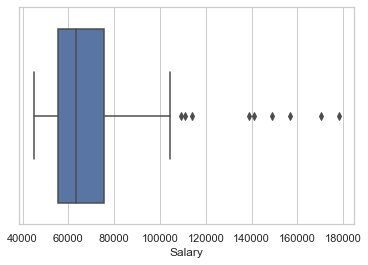

In [37]:
sns.boxplot(x=df_hr_g1["Salary"])

<AxesSubplot:xlabel='Salary'>

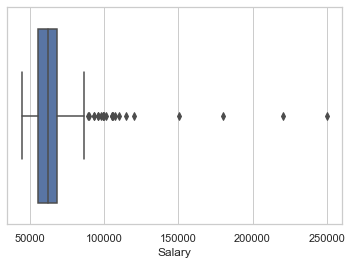

In [43]:
sns.boxplot(x=df_hr_g0["Salary"])

Text(0, 0.5, 'Amount of employees')

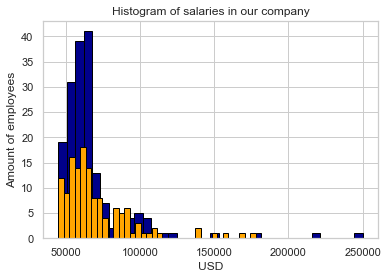

In [56]:
plt.hist(df_hr_g0['Salary'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['Salary'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что хотя количество объектов и отличаются (высота столбиков),
# в самих распределениях нет особых различий

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [9]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_sal'] = np.where(
                            df_hr['Salary'] > 
                            np.mean(df_hr.Salary) + 3*np.std(df_hr.Salary),                 
                            1, 0)

In [10]:
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,anomally_sal
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15,1
96,"Foss, Jason",10015,0,0,1,1,3,4,0,178000,...,5.0,Indeed,Exceeds,5.00,5,5,1/7/2019,0,15,1
131,"Houlihan, Debra",10272,1,1,0,1,6,3,0,180000,...,2.0,LinkedIn,Fully Meets,4.50,4,0,1/21/2019,0,19,1
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,...,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10,1
190,"Monroe, Peter",10288,1,1,1,1,3,2,1,157000,...,5.0,Diversity Job Fair,Needs Improvement,2.39,3,6,2/22/2019,4,13,1
240,"Roper, Katie",10086,0,0,0,1,3,3,0,150290,...,13.0,Indeed,Fully Meets,4.94,3,5,2/6/2019,0,17,1
244,"Ruiz, Ricardo",10222,0,2,1,5,3,3,1,148999,...,5.0,Diversity Job Fair,Fully Meets,4.30,4,6,1/4/2015,0,8,1
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,1


In [ ]:
"""

У нас получилось 8 человек с ультравысокой зарплатой. 
Вероятно мы нашли лидеров бизнеса или людей, на которых компания делает ставку

Обратите внимание на их оценки перформанса (PerformanceScore), 
оценку уровня вовлеченности (EngagementSurvey). 

Какие предварительные выводы/гипотезы можно сделать? 


"""

## Оценка абсентеизма - количества отсутствий на рабочем месте

(array([14., 21., 16., 23., 12., 16., 21., 11., 14., 10., 15.,  8., 17.,
        17., 20., 23., 15.,  8., 16., 14.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

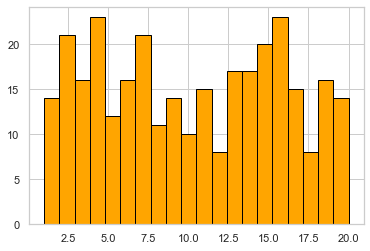

In [7]:
plt.hist(df_hr['Absences'], color = 'orange', edgecolor = 'black', bins = 20)

Каких-то заментых возмущений не наблюдается, распределение плюс-минус случайное. 

Из метода .describe() выше нам известно, что 75-перцентиль количества отсутствий находится на уровне 15. 

Давайте также посчитаем где лежит 90-й перцентиль. 



In [90]:
df_hr.Absences.quantile(q=0.9)

18.0

Это означает, что 90% сотрудников в выборке имеют менее 18 отсутствий.

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого 18 и более отсутствий. 

In [98]:
df_hr_ab = df_hr[df_hr['Absences'] > 17]
df_hr_ab

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,anomally_sal
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19,0
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19,0
15,"Bates, Norman",10061,0,0,1,4,5,3,0,57834,1,19,Production Technician I,MA,2050,10/18/81,M,Single,US Citizen,No,White,2/21/2011,8/4/2017,attendance,Terminated for Cause,Production,Kelley Spirea,18.0,Google Search,Fully Meets,5.00,4,0,4/5/2017,0,20,0
22,"Billis, Helen",10003,1,1,0,1,5,4,0,62910,0,19,Production Technician I,MA,2031,09/01/89,F,Married,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Indeed,Exceeds,5.00,3,0,2/27/2019,0,19,0
32,"Bunbury, Jessica",10188,1,1,0,5,6,3,0,74326,1,3,Area Sales Manager,VA,21851,06/01/64,F,Married,Eligible NonCitizen,No,Black or African American,8/15/2011,8/2/2014,Another position,Voluntarily Terminated,Sales,John Smith,17.0,Google Search,Fully Meets,3.14,5,0,2/10/2013,1,19,0
61,"Daniele, Ann",10212,1,1,0,3,3,3,0,85028,0,28,Sr. Network Engineer,CT,6033,01/18/52,F,Married,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,LinkedIn,Fully Meets,3.10,5,8,2/12/2019,0,19,0
85,"Evensen, April",10296,0,0,0,4,5,2,0,59124,1,19,Production Technician I,MA,2458,05/06/89,F,Single,US Citizen,No,White,2/17/2014,2/25/2018,"no-call, no-show",Terminated for Cause,Production,Elijiah Gray,16.0,Google Search,Needs Improvement,2.30,3,0,1/15/2017,5,19,0
86,"Exantus, Susan",10290,1,1,0,4,4,2,0,99280,1,24,Software Engineer,MA,1749,05/15/87,F,Married,US Citizen,No,Black or African American,5/2/2011,6/5/2013,attendance,Terminated for Cause,Software Engineering,Alex Sweetwater,10.0,Indeed,Needs Improvement,2.10,5,4,8/10/2012,4,19,0
92,"Fidelia, Libby",10049,1,1,0,1,5,3,0,58530,0,19,Production Technician I,MA,2155,03/16/81,F,Married,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Google Search,Fully Meets,5.00,5,0,1/29/2019,0,19,0
93,"Fitzpatrick, Michael J",10093,0,0,1,5,5,3,0,72609,1,20,Production Technician II,MA,2143,10/01/81,M,Single,US Citizen,Yes,White,5/16/2011,6/24/2013,hours,Voluntarily Terminated,Production,Amy Dunn,11.0,Google Search,Fully Meets,4.76,5,0,4/5/2013,0,20,0


Получили 38 человек. У всех у них по 19 или 20 отсутствий. 

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Набор содержит информацию о 311 сотрудниках, часть из которых уже покинули компанию. Исторические данные смешаны с фактическими данными о сотрудниках
2. Зарплаты между гендерами распределены скорее всего равномерно, явных искажений не наблюдается
3. Отсутствия распределены предположительно случайно от 0 до 20, ни у кого нет более 20 отсутствий
4. У нас в выборке 38 человек с 18 отсутствиями или более, это больше чем у 90% персонала. 